**This assignment is in two parts. This is Part B; make sure to also complete Part A. Read the notebook from the beginning and answer the questions as you go. You can add as many cells as you want. Submission instructions are at the end. See Canvas for general rules about Assignments and collaboration.**

# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `https://dlsun.github.io/pods/data/ca_dds_expenditures.csv` contains data on about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

In [1]:
# YOUR CODE HERE
import pandas as pd

In [2]:
df_disc = pd.read_csv("https://dlsun.github.io/pods/data/ca_dds_expenditures.csv")
df_disc

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic
...,...,...,...,...,...,...
995,99622,51+,86,Female,57055,White not Hispanic
996,99715,18 to 21,20,Male,7494,Hispanic
997,99718,13 to 17,17,Female,3673,Multi Race
998,99791,6 to 12,10,Male,3638,Hispanic


<Axes: title={'center': 'Average Expenditures for Hispanics and White not Hispanic'}, xlabel='Ethnicity', ylabel='Average Expenditures ($)'>

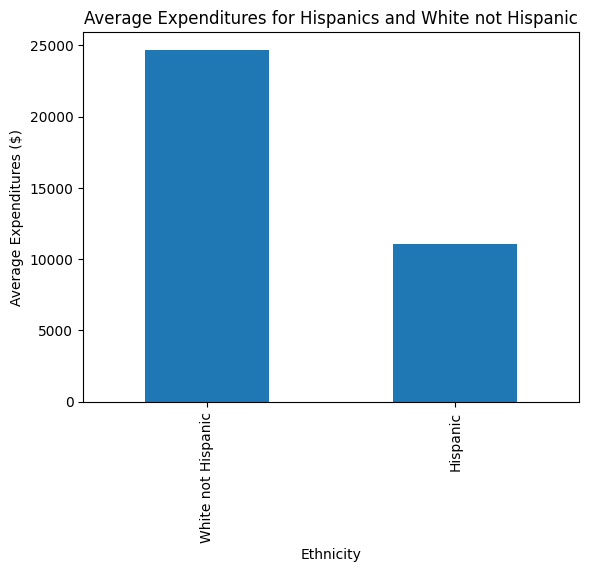

In [3]:
df_disc1 = df_disc.groupby("Ethnicity")["Expenditures"].mean()
df_disc1[["White not Hispanic", "Hispanic"]].plot.bar(ylabel="Average Expenditures ($)", title="Average Expenditures for Hispanics and White not Hispanic")


**YOUR EXPLANATION HERE**

On average, white not hispanic people get significantly more funding yearly that hispanic people.

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_.

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

In [4]:
# YOUR CODE HERE
df_disc2 = df_disc[(df_disc["Ethnicity"] == "Hispanic") | (df_disc["Ethnicity"] == "White not Hispanic")]
df_disc2


,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic
...,...,...,...,...,...,...
992,99114,18 to 21,18,Male,5298,Hispanic
995,99622,51+,86,Female,57055,White not Hispanic
996,99715,18 to 21,20,Male,7494,Hispanic
998,99791,6 to 12,10,Male,3638,Hispanic


In [5]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'

In [6]:
df_disc21 = df_disc2.groupby(["Ethnicity", "Age Cohort"])["Expenditures"].mean().reset_index()
df_disc21

,Ethnicity,Age Cohort,Expenditures
0,Hispanic,0 to 5,1393.204545
1,Hispanic,13 to 17,3955.281553
2,Hispanic,18 to 21,9959.846154
3,Hispanic,22 to 50,40924.116279
4,Hispanic,51+,55585.000000
5,Hispanic,6 to 12,2312.186813
6,White not Hispanic,0 to 5,1366.900000
7,White not Hispanic,13 to 17,3904.358209
8,White not Hispanic,18 to 21,10133.057971
9,White not Hispanic,22 to 50,40187.624060


In [7]:
df_disc21["Age Cohort"] = pd.Categorical(df_disc21["Age Cohort"], ["0 to 5", "6 to 12", "13 to 17", "18 to 21", "22 to 50", "51+"])
df_disc21

,Ethnicity,Age Cohort,Expenditures
0,Hispanic,0 to 5,1393.204545
1,Hispanic,13 to 17,3955.281553
2,Hispanic,18 to 21,9959.846154
3,Hispanic,22 to 50,40924.116279
4,Hispanic,51+,55585.000000
5,Hispanic,6 to 12,2312.186813
6,White not Hispanic,0 to 5,1366.900000
7,White not Hispanic,13 to 17,3904.358209
8,White not Hispanic,18 to 21,10133.057971
9,White not Hispanic,22 to 50,40187.624060


In [13]:
fig = px.bar(
    df_disc21,
    x="Age Cohort",
    y="Expenditures",
    color="Ethnicity",
    barmode="group",
    title="Average Expenditures by Age Cohort for Hispanic and White not Hispanic"
)

fig.update_xaxes(categoryorder='array', 
                 categoryarray= ['0 to 5','6 to 12','13 to 17','18 to 21','22 to 50','51+'])

fig.show()

**YOUR EXPLANATION HERE**

Contrary to question 1, it appears that for each age group that the funds received for Hispanic and White not Hispanic are approximately even (White not Hispanic for some ages are also funded less).

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

In [ ]:
import matplotlib.pyplot as plt

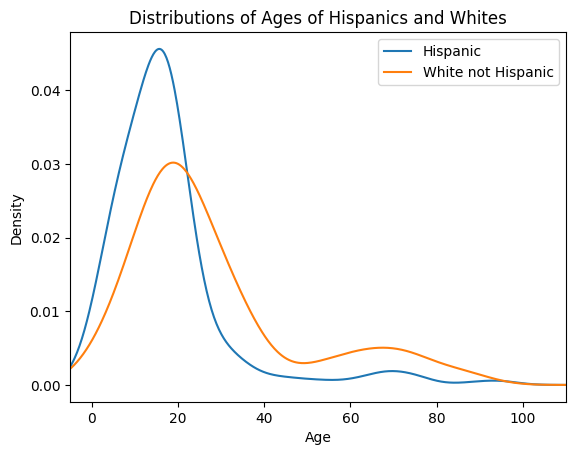

In [ ]:
# YOUR CODE HERE (although you may want to add more code cells)
ax = df_disc2.groupby("Ethnicity")["Age"].plot.density(
    legend=True,
    title="Distributions of Ages of Hispanics and Whites",
    xlim=[-5, 110]
)
plt.ylabel('Density')
plt.xlabel('Age')
plt.show()

In [22]:
fig2 = px.bar(df_disc2.groupby("Age Cohort")["Expenditures"].mean().reset_index(),
              x="Age Cohort",
              y="Expenditures",
              title="Average Expenditures for Each Age Cohort Among Hispanics and White not Hispanics",
              labels={"Age Cohort": "Age Cohort", "Expenditures": "Average Expenditures ($)"})

fig2.update_xaxes(categoryorder='array', 
                 categoryarray=['0 to 5','6 to 12','13 to 17','18 to 21','22 to 50','51+'])

fig2.show()

**YOUR EXPLANATION HERE (although you may want to add more markdown cells)**

In the average expenditures per age cohort plot, we can see that those who are 51+ received the most funding. From the distribution of ages among Hispanics and White not Hispanics, we can see that White not Hispanics have a higher distribution of people over 51. Therefore, there seems to a discrepency known Simpson's Paradox. If we look at the average funding for each age cohort it seems that Hispanic people are slightly funded more. However, White not Hispanics have a higher population of older people which pulls their average expenditures up. On a similar note, the Hispanic younger population is higher which pulls their average expenditures down.

## Submission Instructions

- After you have completed the notebook, select **Runtime > Run all**
- After the notebook finishes rerunning check to make sure that you have no errors and everything runs properly.  Fix any problems and redo this step until it works.
- Rename this notebook by clicking on "DATA 301 Lab 2A - YOUR NAMES HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you and your partner (if you worked with one).
- Expand all cells with View > Expand Sections
- Save a PDF version: File > Print > Save as PDF
    - Under "More Settings" make sure "Background graphics" is checked
    - Printing Colab to PDF doesn't always work so well and some of your output might get cutoff. That's ok.
    - It's not necessary, but if you want a more nicely formatted PDF you can uncomment and run the code in the following cell. (Here's a [video](https://www.youtube.com/watch?v=-Ti9Mm21uVc) with other options.)
- Download the notebook: File > Download .ipynb
- Submit the notebook and PDF in Canvas. If you worked in a pair, only one person should submit in Canvas.

In [ ]:
# !wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
# from colab_pdf import colab_pdf
# colab_pdf('DATA 301 Lab1A - YOUR NAMES HERE.ipynb')